# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

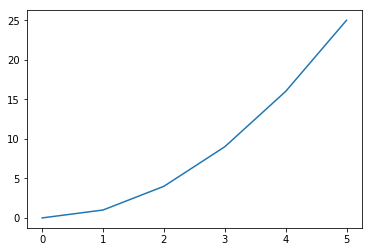

In [4]:
plt.plot([0,1,2,3,4,5], [0,1,4,9,16,25])

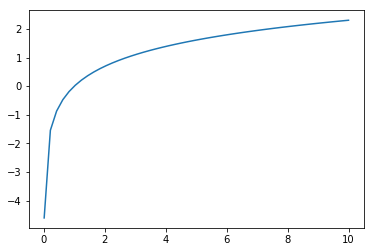

In [8]:
xs = np.linspace(.01, 10)
ys = np.log(xs)

plt.plot(xs, ys)

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


In [11]:
np.arange(4,7,0.1)

array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9])

In [14]:
np.linspace(4,7, 12)

array([4.        , 4.27272727, 4.54545455, 4.81818182, 5.09090909,
       5.36363636, 5.63636364, 5.90909091, 6.18181818, 6.45454545,
       6.72727273, 7.        ])

### Scatter plots

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


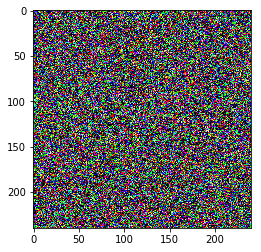

In [21]:
xs = np.random.randn(240,240,3)
plt.imshow(xs)

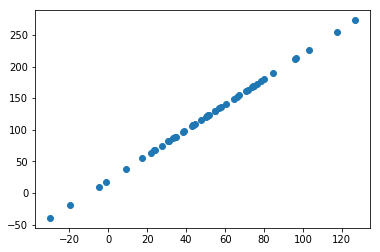

In [25]:
xs = np.random.randn(50) * 30 + 50
ys = 2 * xs + 20

plt.scatter(xs, ys)

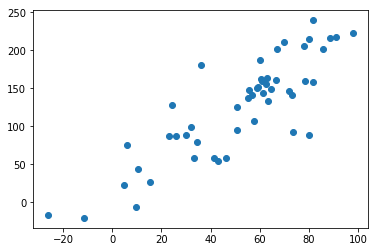

In [28]:
xs = np.random.randn(50) * 30 + 50
ys = 2 * xs + 20 + np.random.randn(50) *30

plt.scatter(xs, ys)

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


This is what happens if you make a line plot of unsorted data:

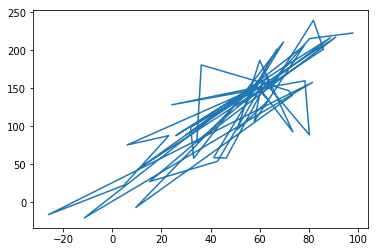

In [29]:
plt.plot(xs, ys)

### Bar plots

Do not confuse with histograms

([<matplotlib.axis.XTick at 0x7f55486aba20>,
 <a list of 3 Text xticklabel objects>)

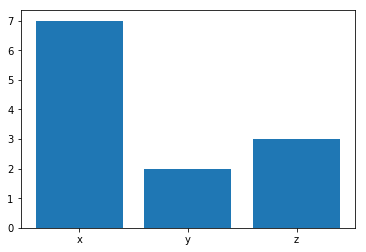

In [32]:
plt.bar(range(3), [7,2,3])
plt.xticks(range(3),['x', 'y', 'z'])

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

(50, 150)

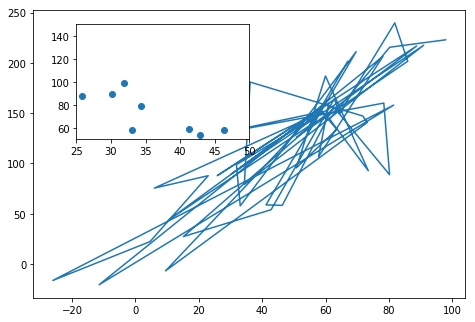

In [51]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_axes([0,0,1,1])
axes2 = f.add_axes([0.10,0.55,.4,.4])

axes1.plot(xs, ys)
axes2.scatter(xs, ys)
axes2.set_xlim(25,50)
axes2.set_ylim(50,150)

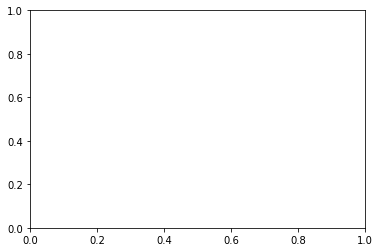

In [53]:
plt.gcf()
plt.gca()

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

(50, 150)

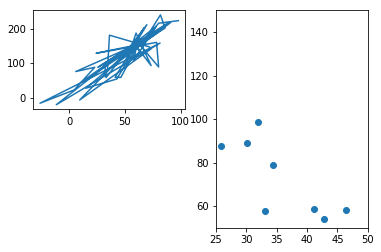

In [58]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_subplot(2,2,1)
axes2 = f.add_subplot(1,2,2)

axes1.plot(xs, ys)
axes2.scatter(xs, ys)
axes2.set_xlim(25,50)
axes2.set_ylim(50,150)

### `plt.subplots()`

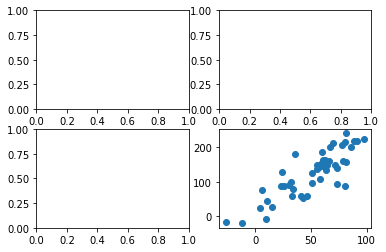

In [64]:
f, ax = plt.subplots(2,2)

ax[1,1].scatter(xs, ys)

/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


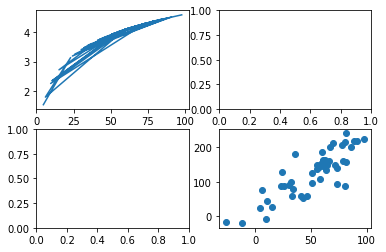

In [68]:
f, ax = plt.subplots(2,2)

ax[1,1].scatter(xs, ys)
ax[0,0].plot(xs, np.log(xs))

### Sharing axis

/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


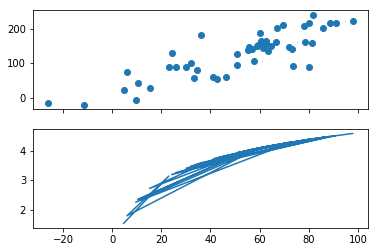

In [70]:
f, ax = plt.subplots(2,1, sharex=True)

ax[0].scatter(xs, ys)
ax[1].plot(xs, np.log(xs))

/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


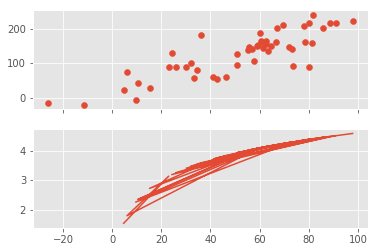

In [73]:
plt.style.use('ggplot')
f, ax = plt.subplots(2,1, sharex=True)

ax[0].scatter(xs, ys)
ax[1].plot(xs, np.log(xs))

/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


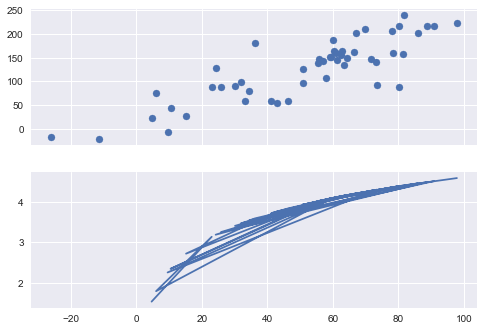

In [75]:
plt.style.use('seaborn')
f, ax = plt.subplots(2,1, sharex=True)

ax[0].scatter(xs, ys)
ax[1].plot(xs, np.log(xs))

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

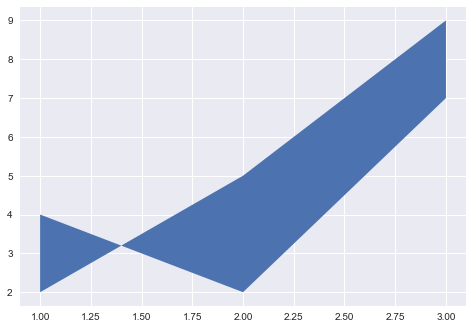

In [76]:
plt.fill_between([1,2,3], [4,2,7], [2,5,9])

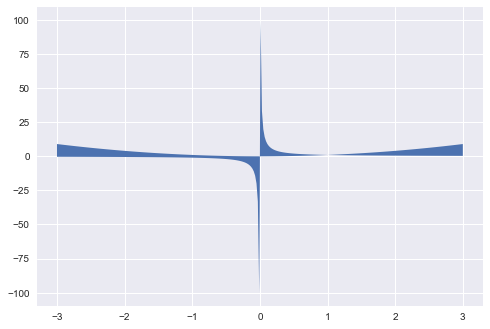

In [80]:
xs = np.linspace(-3, 3, 300)

plt.fill_between(xs, xs ** 2, 1 / xs)

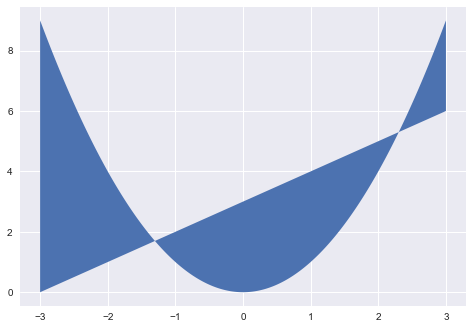

In [82]:
plt.fill_between(xs, xs ** 2, xs + 3)

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

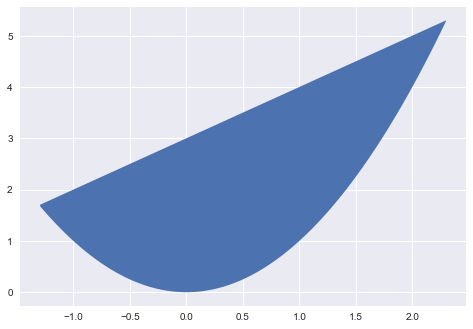

In [83]:
plt.fill_between(xs, xs ** 2, xs + 3,  (xs + 3) > xs**2)

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



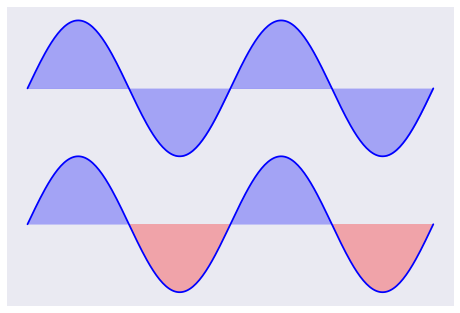

In [98]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, Y+1, 1, alpha=.3, color='blue')
plt.fill_between(X, Y-1, -1, alpha=.3, color='blue', where=Y-1 > -1)
plt.fill_between(X, Y-1, -1, alpha=.3, color='red', where=Y-1 < -1)
plt.xticks([])
plt.yticks([])
plt.savefig('sine_exercise.png')

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

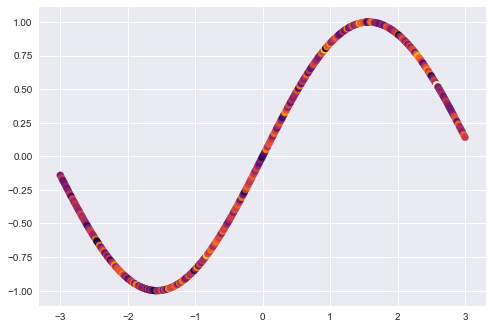

In [110]:
from matplotlib import cm

cmap = cm.get_cmap('inferno')
plt.scatter(xs, np.sin(xs), c=np.random.randn(len(xs)), cmap=cmap)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

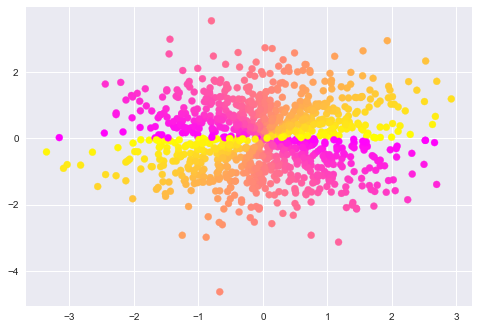

In [118]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
cmap = cm.get_cmap('spring')

plt.scatter(X,Y, c=np.arctan(X/Y), cmap=cmap)
plt.show()

### Markers and linestyles

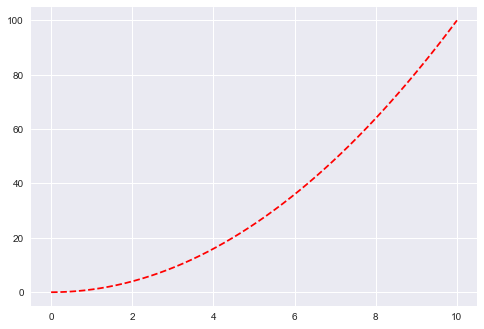

In [125]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

(array([ 2.,  3.,  3.,  5.,  7., 15., 21., 28., 32., 45., 59., 83., 95.,
        95., 82., 79., 91., 57., 55., 52., 31., 25., 19., 17.,  9.,  7.,
         4.,  1.,  1.,  1.]),
 array([-3.0490859 , -2.83866766, -2.62824942, -2.41783117, -2.20741293,
        -1.99699469, -1.78657645, -1.57615821, -1.36573997, -1.15532172,
        -0.94490348, -0.73448524, -0.524067  , -0.31364876, -0.10323051,
         0.10718773,  0.31760597,  0.52802421,  0.73844245,  0.94886069,
         1.15927894,  1.36969718,  1.58011542,  1.79053366,  2.0009519 ,
         2.21137014,  2.42178839,  2.63220663,  2.84262487,  3.05304311,
         3.26346135]),
 <a list of 30 Patch objects>)

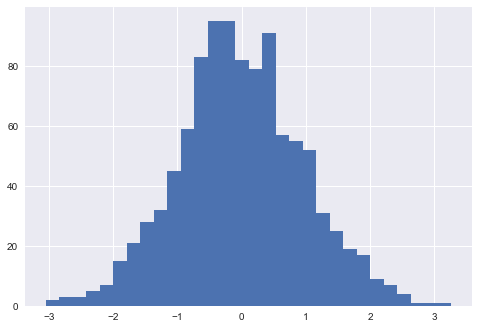

In [128]:
plt.hist(X, bins=30)

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.

$$\mu = \frac{\sum_{i=1}^nx_i}{n}$$

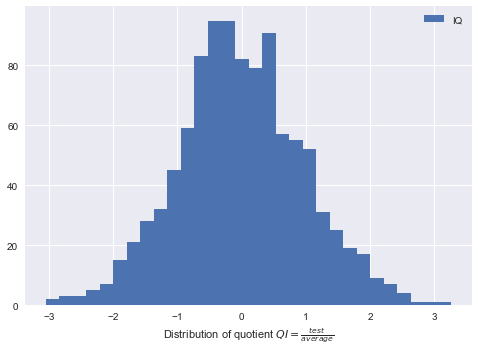

In [135]:
plt.hist(X, bins=30, label='IQ')
plt.xlabel(r'Distribution of quotient $QI=\frac{test}{average}$')
plt.legend()

## Legends

## Ticks, tick labels, limits

### Ticks

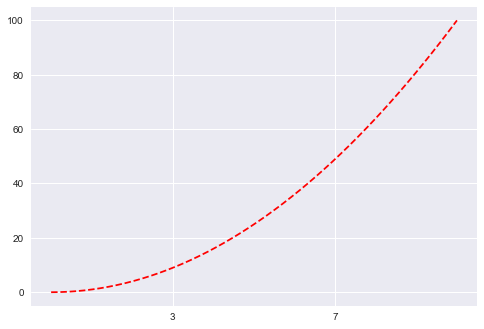

In [140]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);

### Tick labels

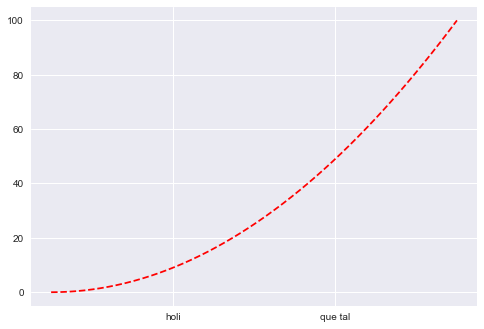

In [142]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);
ax.set_xticklabels(['holi','que tal']);

### Limits

(20, 60)

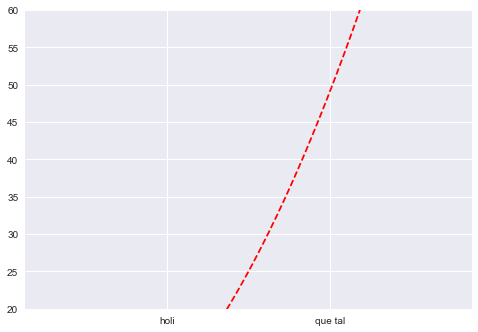

In [143]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);
ax.set_xticklabels(['holi','que tal']);
ax.set_ylim(20, 60)

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

In [150]:
df = pd.read_csv('houses.csv', index_col=0)
short_column_names = ['local_prices', 'bathrooms', 'site_area', 
                      'living_area', 'garages', 'rooms', 
                      'bedrooms', 'age', 'construction_type', 
                      'architecture', 'fireplaces', 'price']

df.columns = short_column_names
df

,local_prices,bathrooms,site_area,living_area,garages,rooms,bedrooms,age,construction_type,architecture,fireplaces,price
index,,,,,,,,,,,,
1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,3,1,0,25.9
2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1,1,0,29.5
3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2,1,0,27.9
4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,4,1,0,25.9
5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,3,1,0,29.9
6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2,1,0,29.9
7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2,1,1,30.9
8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1,1,0,28.9
9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2,1,1,84.9


## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

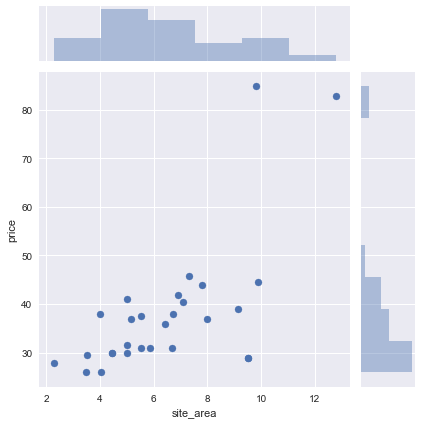

In [152]:
import seaborn as sns

sns.jointplot(df['site_area'], df['price'])

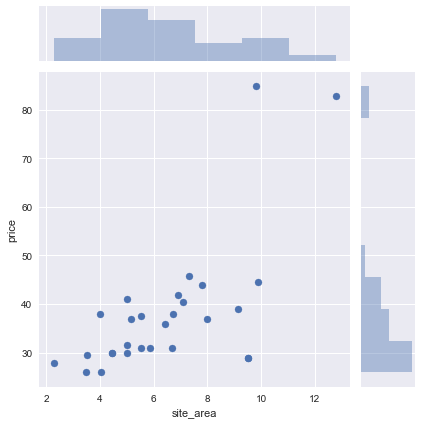

In [153]:
sns.jointplot(data=df, x='site_area', y='price')

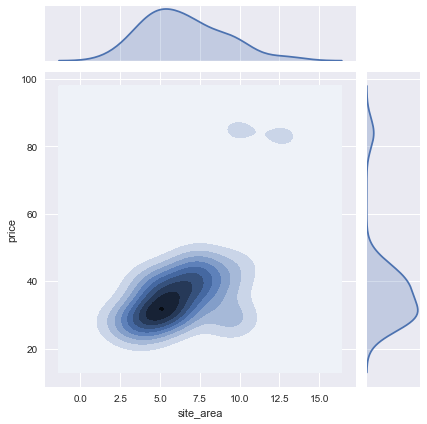

In [154]:
sns.jointplot(data=df, x='site_area', y='price', kind='kde')

### Histogram

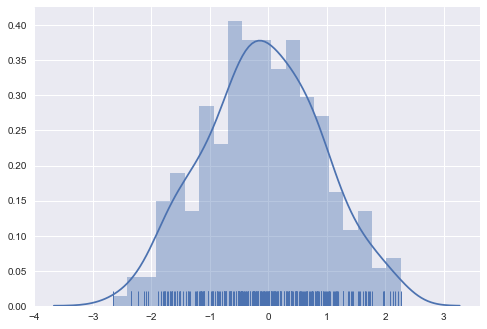

In [160]:
sns.distplot(np.random.randn(300), bins=20, rug=True)

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

In [163]:
smaller = df[['local_prices', 'site_area', 'living_area', 'rooms', 'age']]
smaller.head()

,local_prices,site_area,living_area,rooms,age
index,,,,,
1,4.9176,3.472,0.998,7,42
2,5.0208,3.531,1.500,7,62
3,4.5429,2.275,1.175,6,40
4,4.5573,4.050,1.232,6,54
5,5.0597,4.455,1.121,6,42


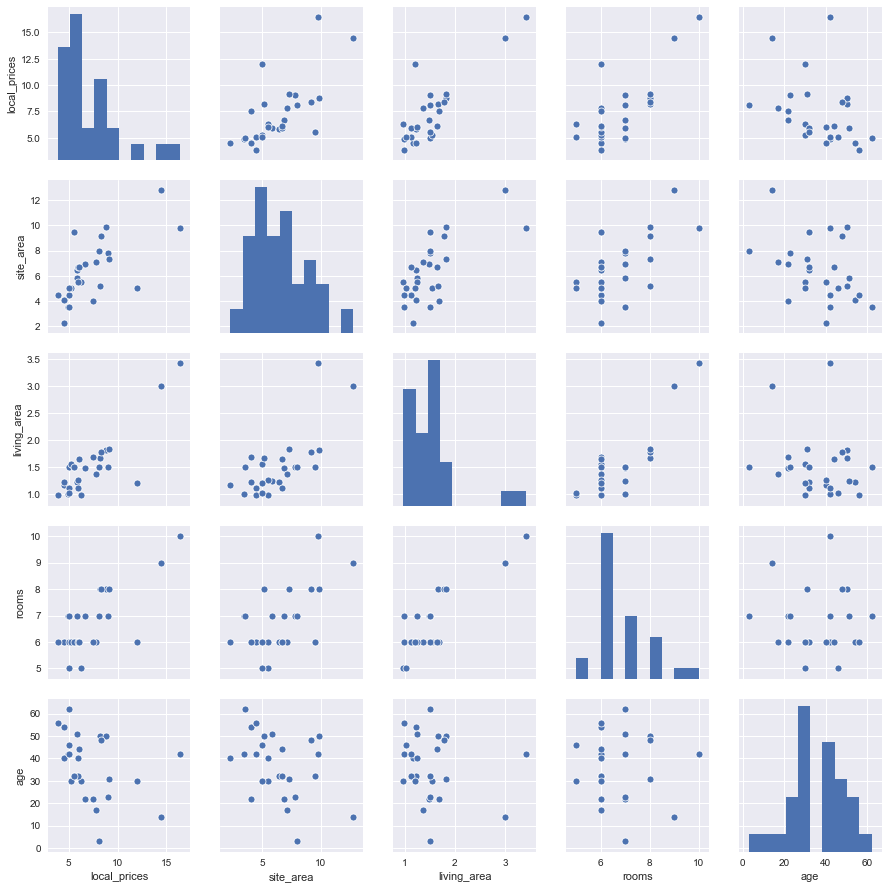

In [164]:
sns.pairplot(smaller)

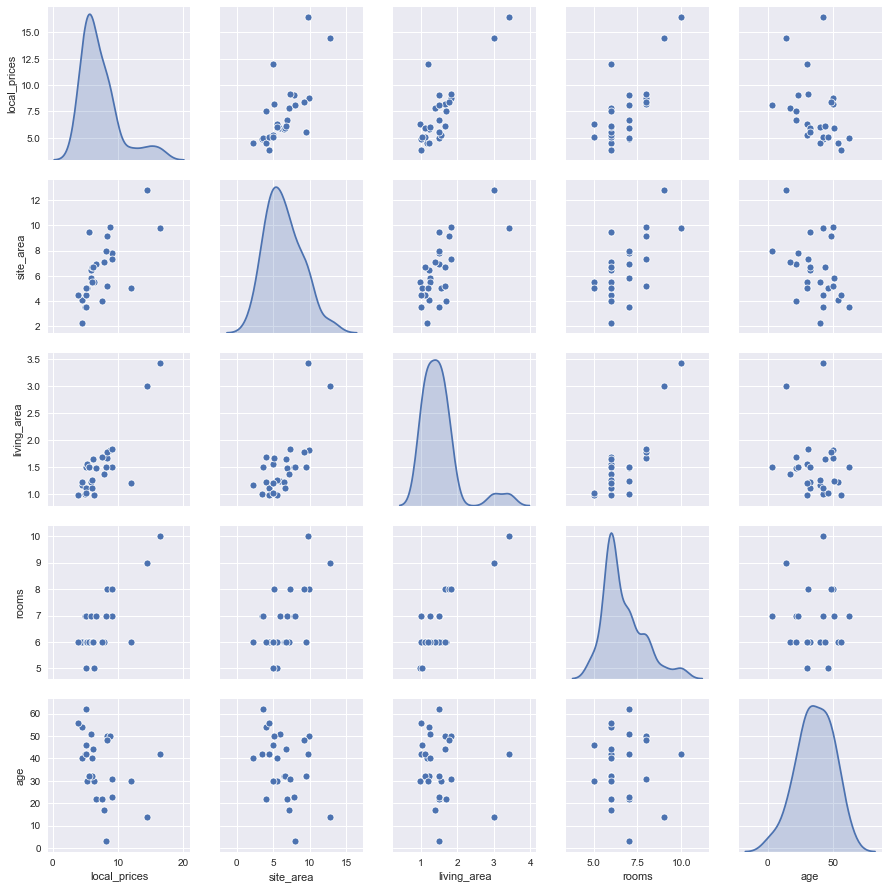

In [168]:
sns.pairplot(smaller, diag_kind='kde')

/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


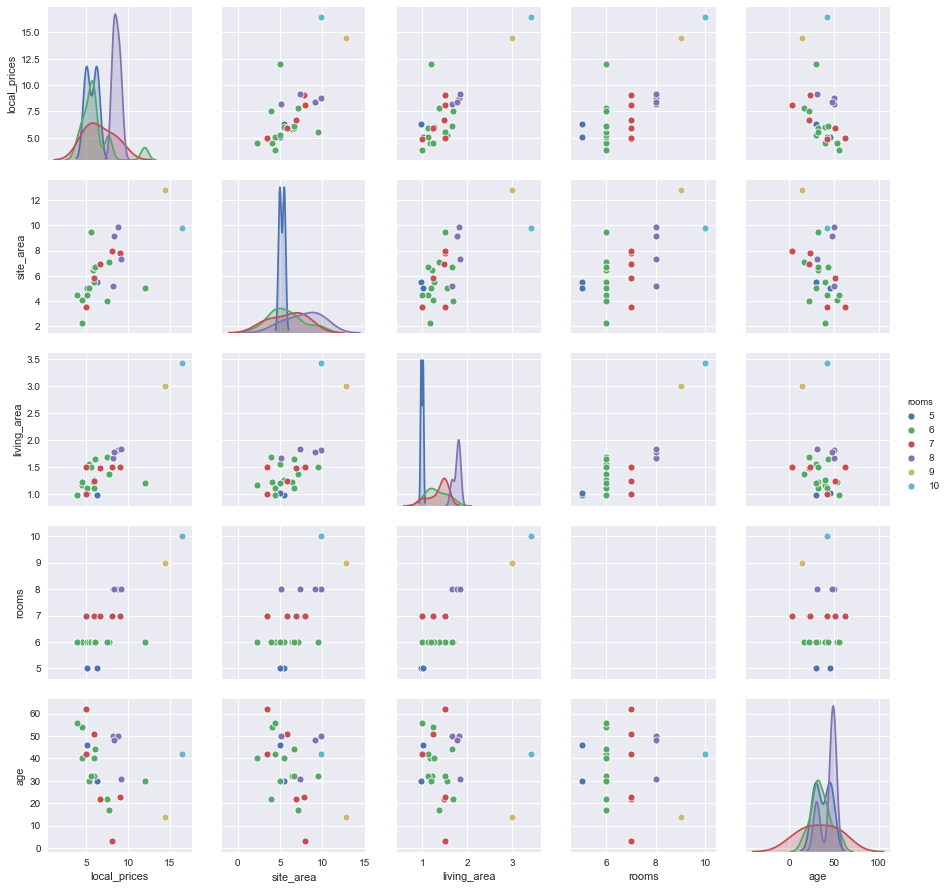

In [169]:
sns.pairplot(data=smaller, diag_kind='kde', hue='rooms')

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

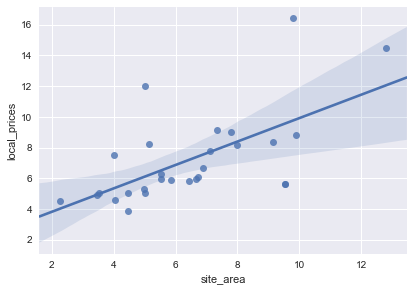

In [171]:
sns.lmplot(data=smaller, x='site_area', y='local_prices')
plt.gcf().set_size_inches(6,4)

## Categorical data

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

In [173]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Swarm plot

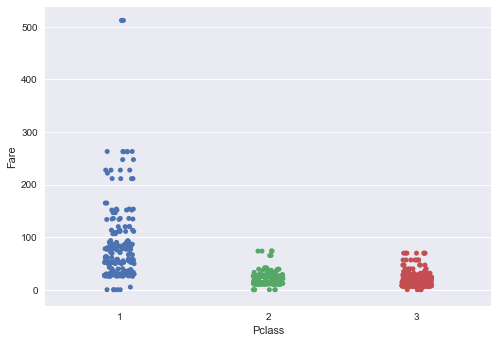

In [174]:
sns.stripplot(data=titanic, x='Pclass', y='Fare')

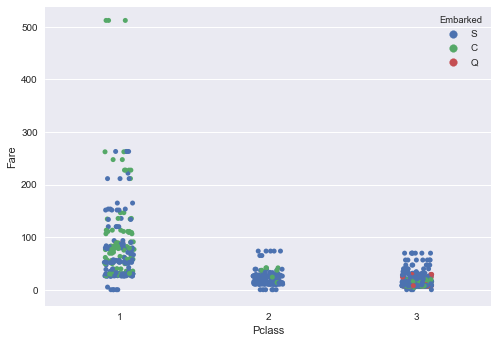

In [175]:
sns.stripplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')

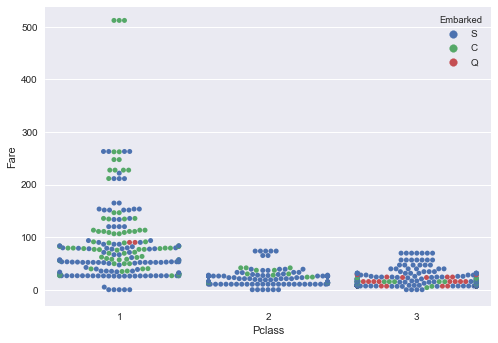

In [176]:
sns.swarmplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')

### Boxplot

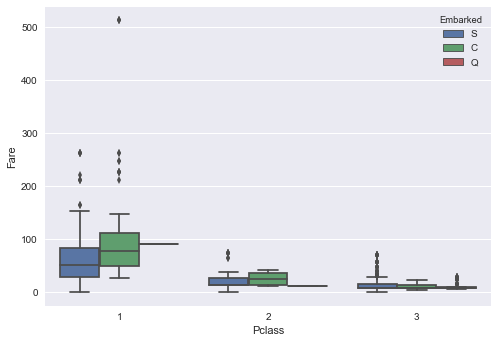

In [177]:
sns.boxplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')

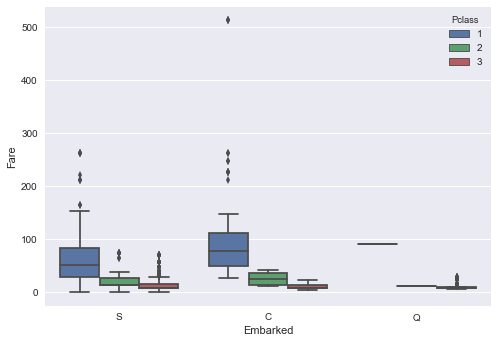

In [181]:
sns.boxplot(data=titanic, x='Embarked', y='Fare', hue='Pclass')

### Barplot / countplot

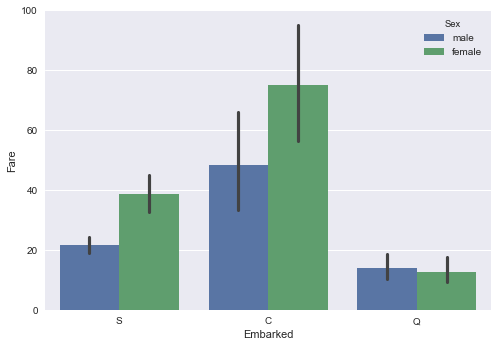

In [186]:
sns.barplot(data=titanic, x='Embarked', y='Fare',hue='Sex')

### Pointplot

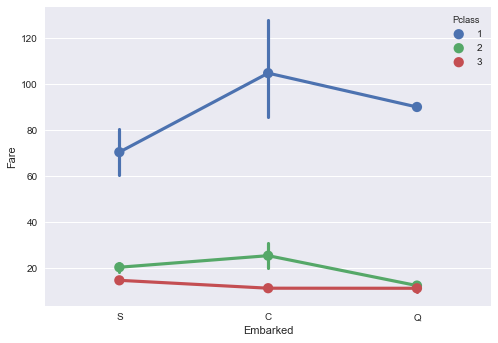

In [187]:
sns.pointplot(data=titanic, x='Embarked', y='Fare', hue='Pclass')

## Other types

### Heatmap

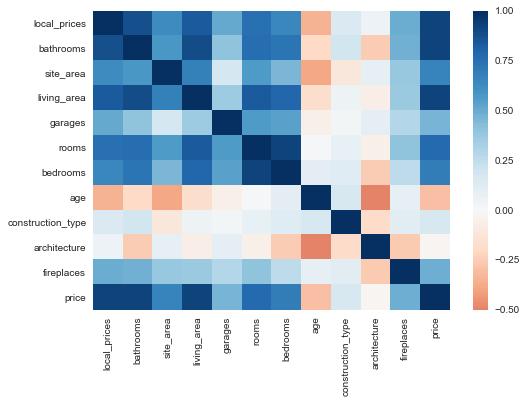

In [199]:
from matplotlib import cm

sns.heatmap(df.corr(), cmap='RdBu', center=0)

### Clustermap

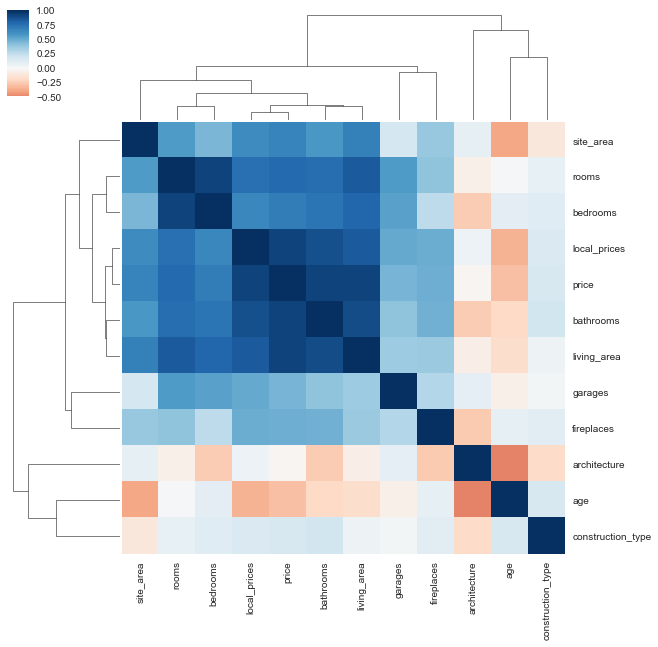

In [200]:
sns.clustermap(df.corr(), cmap='RdBu', center=0)

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

## Dash

"Shiny for Python" 


# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)